# 数据挖掘作业2
## 姓名：刘子书 学号：1120201818
### 数据集：GitHub Dataset

In [41]:
#导入必要的包
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from collections import Counter
from math import isnan
import math
import os

## 查看数据集并对数据集进行了解

In [42]:
#查看当前文件夹下有哪些数据集以及数据集所处的路径
import os
for dirname, _, filenames in os.walk('D:\Python\Jupyter\datamining_1\GitHub Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#数据集文件解释，这里我们拿repository_data.csv做数据分析        

D:\Python\Jupyter\datamining_1\GitHub Dataset\github_dataset.csv
D:\Python\Jupyter\datamining_1\GitHub Dataset\repository_data.csv


In [43]:
import os
#读取数据集
path = 'D:\Python\Jupyter\datamining_1\GitHub Dataset\\'
data = pd.read_csv(path+'repository_data.csv',index_col=False ,low_memory=False)
data.head()#默认展示前五行数据

# 数据集的含义
# 列名----------------含义
# name                仓库的名字（标称）
# stars_count         星数（数值）
# forks_count         分支数（数值）
# watchers            观看者（数值）
# pull_requests       拉取请求计数（数值）
# primary_language    主要语言（标称）
# languages_used      使用的所有语言列表（标称）
# commit_count        仓库提交次数（数值）
# created_at          时间戳（标称）
# licence             许可证（标称）

,name,stars_count,forks_count,watchers,pull_requests,primary_language,languages_used,commit_count,created_at,licence
0,freeCodeCamp,359805,30814,8448,31867,TypeScript,"['TypeScript', 'JavaScript', 'CSS', 'Shell', '...",32231.00,2014-12-24T17:49:19Z,"BSD 3-Clause ""New"" or ""Revised"" License"
1,996.ICU,264811,21470,4298,1949,NaN,NaN,3189.00,2019-03-26T07:31:14Z,Other
2,free-programming-books,262380,53302,9544,8235,NaN,NaN,8286.00,2013-10-11T06:50:37Z,Other
3,coding-interview-university,244927,65038,8539,867,NaN,NaN,2314.00,2016-06-06T02:34:12Z,Creative Commons Attribution Share Alike 4.0 I...
4,awesome,235223,24791,7446,1859,NaN,NaN,1074.00,2014-07-11T13:42:37Z,Creative Commons Zero v1.0 Universal


In [44]:
data.dtypes #每列数据的数据类型

name                 object
stars_count           int64
forks_count           int64
watchers              int64
pull_requests         int64
primary_language     object
languages_used       object
commit_count        float64
created_at           object
licence              object
dtype: object

In [45]:
data.shape #数据集的大小

(2917951, 10)

## 数据摘要和可视化
### 数据摘要
#### （1）标称属性，给出每个可能取值的频数

In [46]:
# 由上面对数据集各列进行分析得知，该数据集的标称属性有'name','primary_language','languages_used ','created_at','licence'五个标称属性

# (1)仓库名字
pd.value_counts(data['name'])

dotfiles                   5590
blog                       2038
docs                       1350
website                    1163
scripts                     649
                           ... 
PVIO                          1
arukas-kcptun-client          1
hubot-zabbix-scripts          1
community-blogger             1
CodeBlocks_blank_prject       1
Name: name, Length: 2410863, dtype: int64

In [47]:
# (2)主要语言
pd.value_counts(data['primary_language'])

JavaScript            451954
Python                451473
Java                  202394
C++                   150066
PHP                   116058
                       ...  
desktop                    1
Ragel in Ruby Host         1
Sieve                      1
Rouge                      1
Unity3D Asset              1
Name: primary_language, Length: 497, dtype: int64

In [48]:
# (3)当使用的所有语言列表
pd.value_counts(data['languages_used'])

['Python']                                                     257679
['JavaScript']                                                 157741
['Java']                                                       117624
['C#']                                                          60299
['PHP']                                                         56333
                                                                ...  
['JavaScript', 'Perl', 'CSS', 'Arduino', 'Shell']                   1
['Rust', 'TypeScript', 'Makefile', 'Shell', 'JavaScript']           1
['CSS', 'HTML', 'Python', 'JavaScript', 'SCSS', 'Procfile']         1
['Mathematica', 'Python', 'TeX']                                    1
['C++', 'Makefile', 'C', 'Shell', 'JavaScript', 'Groff']            1
Name: languages_used, Length: 328148, dtype: int64

In [49]:
# (4)时间戳
pd.value_counts(data['created_at'])

2017-06-05T20:53:54Z    10
2017-06-05T20:53:58Z     9
2014-01-17T08:00:09Z     8
2015-12-02T08:00:06Z     7
2010-05-26T23:38:08Z     7
                        ..
2017-12-07T15:12:06Z     1
2018-04-25T09:57:04Z     1
2016-03-11T16:42:06Z     1
2017-12-27T23:45:39Z     1
2016-09-07T15:19:56Z     1
Name: created_at, Length: 2837008, dtype: int64

In [50]:
# (5)许可证
pd.value_counts(data['licence'])

MIT License                                                   784251
Apache License 2.0                                            210698
Other                                                         167987
GNU General Public License v3.0                               159443
BSD 3-Clause "New" or "Revised" License                        47078
GNU General Public License v2.0                                43297
GNU Affero General Public License v3.0                         21554
BSD 2-Clause "Simplified" License                              16819
The Unlicense                                                  14400
GNU Lesser General Public License v3.0                         14002
Mozilla Public License 2.0                                     10668
Creative Commons Zero v1.0 Universal                           10353
ISC License                                                     8232
GNU Lesser General Public License v2.1                          6168
Eclipse Public License 1.0        

#### （2）数值属性，给出5数概括及缺失值的个数

In [51]:
# 该数据集的数值属性有'stars_count','forks_count','watchers','pull_requests','commit_count'五个属性
digital_data1 = ['stars_count','forks_count','watchers','pull_requests','commit_count']
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.2f' % x) 
data[digital_data1].describe()

,stars_count,forks_count,watchers,pull_requests,commit_count
count,2917951.00,2917951.00,2917951.00,2917951.00,2916030.00
mean,76.41,20.95,7.14,24.31,614.37
std,909.68,302.95,37.62,378.44,16808.01
min,2.00,0.00,0.00,0.00,1.00
25%,7.00,1.00,2.00,0.00,9.00
50%,12.00,4.00,3.00,1.00,27.00
75%,30.00,11.00,6.00,6.00,89.00
max,359805.00,242208.00,9544.00,301585.00,4314502.00


stars_count：最大值359805，最小值2，四分位数[7,12,30]

forks_count：最大值242208，最小值0.四分位数[1,4,11]

watchers：最大值9544，最小值0，四分位数[2,3,6]

pull_requests：最大值301585，最小值0，四分位数[0,1,6]

commit_count：最大值4314502，最小值1，四分位数[9,27,89]

In [52]:
print("stars_count缺失值个数为",data['stars_count'].isnull().sum())
print("forks_count缺失值个数为",data['forks_count'].isnull().sum())
print("watchers缺失值个数为",data['watchers'].isnull().sum())
print("pull_requests缺失值个数为",data['pull_requests'].isnull().sum())
print("commit_count缺失值个数为",data['commit_count'].isnull().sum())

stars_count缺失值个数为 0
forks_count缺失值个数为 0
watchers缺失值个数为 0
pull_requests缺失值个数为 0
commit_count缺失值个数为 1921


### 数据可视化
（1）绘制stars_count的直方图、盒图、q-q图

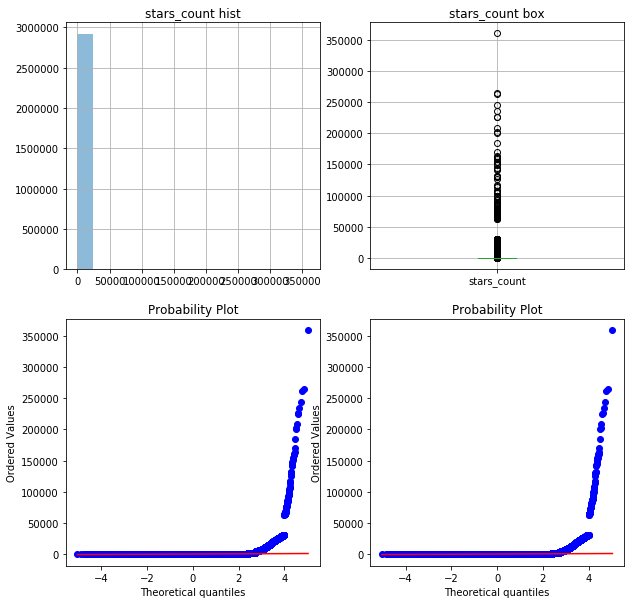

In [53]:
plt.figure(figsize = (10,10))

#直方图
plt.subplot(2,2,1)
plt.title("stars_count hist")
data['stars_count'].hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数

#盒图
plt.subplot(2,2,2)
plt.title("stars_count box")
data['stars_count'].plot(kind='box',grid=True)

#q-q图
plt.subplot(2,2,3)
stats.probplot(data['stars_count'],dist="norm",plot=plt)

#去除缺失值再绘制q-q图
plt.subplot(2,2,4)
data_drop=pd.DataFrame(data['stars_count'].copy(deep=True))
data_drop = data_drop.dropna()
stats.probplot(data_drop['stars_count'], dist="norm", plot=plt)

plt.show()

（2）绘制forks_count的直方图、盒图、q-q图

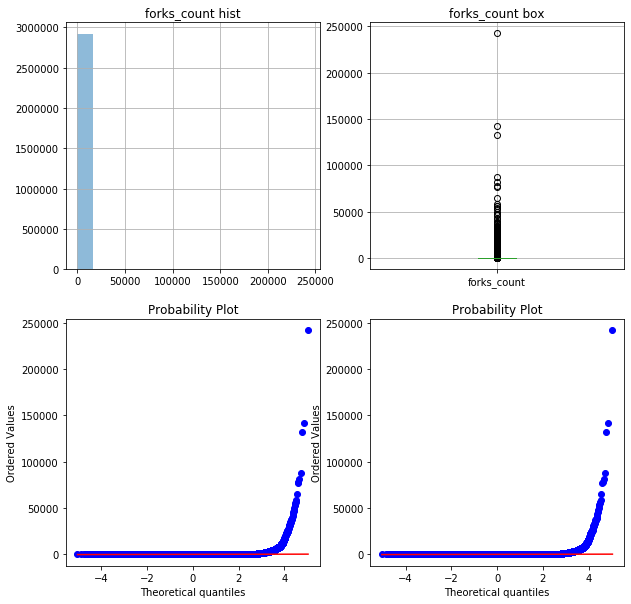

In [54]:
plt.figure(figsize = (10,10))

#直方图
plt.subplot(2,2,1)
plt.title("forks_count hist")
data['forks_count'].hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数

#盒图
plt.subplot(2,2,2)
plt.title("forks_count box")
data['forks_count'].plot(kind='box',grid=True)

#q-q图
plt.subplot(2,2,3)
stats.probplot(data['forks_count'],dist="norm",plot=plt)

#去除缺失值再绘制q-q图
plt.subplot(2,2,4)
data_drop=pd.DataFrame(data['forks_count'].copy(deep=True))
data_drop = data_drop.dropna()
stats.probplot(data_drop['forks_count'], dist="norm", plot=plt)

plt.show()

（3）绘制watchers的直方图、盒图、q-q图

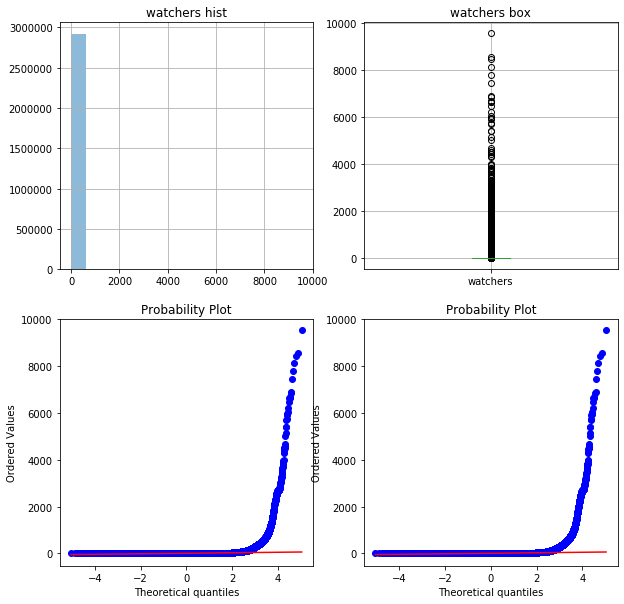

In [55]:
plt.figure(figsize = (10,10))

#直方图
plt.subplot(2,2,1)
plt.title("watchers hist")
data['watchers'].hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数

#盒图
plt.subplot(2,2,2)
plt.title("watchers box")
data['watchers'].plot(kind='box',grid=True)

#q-q图
plt.subplot(2,2,3)
stats.probplot(data['watchers'],dist="norm",plot=plt)

#去除缺失值再绘制q-q图
plt.subplot(2,2,4)
data_drop=pd.DataFrame(data['watchers'].copy(deep=True))
data_drop = data_drop.dropna()
stats.probplot(data_drop['watchers'], dist="norm", plot=plt)

plt.show()

## 数据缺失处理

In [27]:
#绘制表格查看数据缺失值并检验四种方案填充后是否还有缺失值
def missing_data(datatodel):
    missing_num = datatodel.isnull().sum()
    missing_percent = missing_num/datatodel.shape[0]*100
    concat_data = pd.concat([missing_num,missing_percent],axis=1,keys=['missing_num','missing_percent'])
    concat_data['Types'] = datatodel.dtypes
    return concat_data

missing_data(data)

,missing_num,missing_percent,Types
name,12,0.00,object
stars_count,0,0.00,int64
forks_count,0,0.00,int64
watchers,0,0.00,int64
pull_requests,0,0.00,int64
primary_language,218573,7.49,object
languages_used,221984,7.61,object
commit_count,1921,0.07,float64
created_at,0,0.00,object
licence,1378200,47.23,object


由上表可以看出，数值属性commit_count存在缺失值，  
标称属性name、primary_language、languages_used、licence存在缺失值，  
这里缺失的原因可能是由于未完全记录、遗漏或无法获取
### 方案一 缺失值剔除

In [28]:
del_null_data = data.copy(deep=True)
del_null_data = del_null_data.dropna()
#处理缺失数据后的数据展示
missing_data(del_null_data)

,missing_num,missing_percent,Types
name,0,0.00,object
stars_count,0,0.00,int64
forks_count,0,0.00,int64
watchers,0,0.00,int64
pull_requests,0,0.00,int64
primary_language,0,0.00,object
languages_used,0,0.00,object
commit_count,0,0.00,float64
created_at,0,0.00,object
licence,0,0.00,object


+ 新旧数据集对比

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


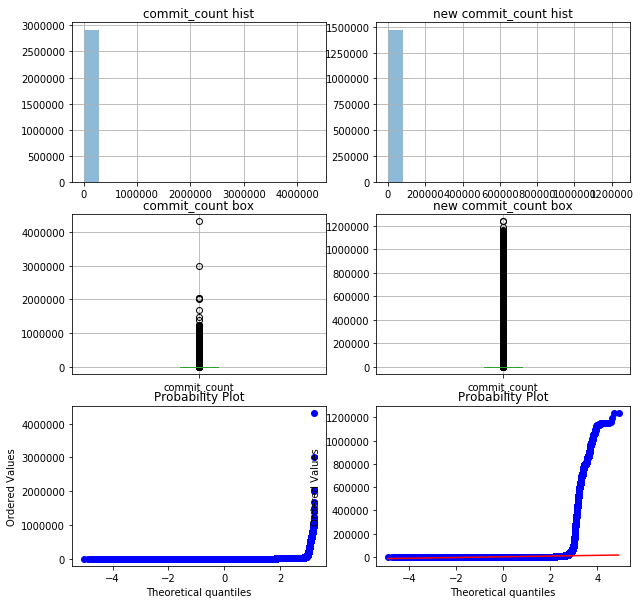

In [29]:
plt.figure(figsize = (10,10))

#直方图
plt.subplot(3,2,1)
plt.title("commit_count hist")
data['commit_count'].hist(alpha=0.5,bins=15)

plt.subplot(3,2,2)
plt.title("new commit_count hist")
del_null_data['commit_count'].hist(alpha=0.5,bins=15)


#盒图
plt.subplot(3,2,3)
plt.title("commit_count box")
data['commit_count'].plot(kind='box',grid=True)

plt.subplot(3,2,4)
plt.title("new commit_count box")
del_null_data['commit_count'].plot(kind='box',grid=True)

#q-q图
plt.subplot(3,2,5)
stats.probplot(data['commit_count'],dist="norm",plot=plt)

plt.subplot(3,2,6)
stats.probplot(del_null_data['commit_count'],dist="norm",plot=plt)

plt.show()

In [30]:
del_null_data[['commit_count']].describe()  #缺失部分剔除后数据的5数概况

,commit_count
count,1471612.00
mean,1032.26
std,22258.89
min,1.00
25%,15.00
50%,44.00
75%,139.00
max,1236686.00


### 方案二 用最高频率值来填补缺失值

In [31]:
#用最高频率来填补缺失值--此处使用深拷贝，否则会改变原值
fill_data_with_most_frequency = data.copy(deep=True)
#对'Data_Value'进行最高频率值填补缺失值
word_counts = Counter(fill_data_with_most_frequency['commit_count'])
top = word_counts.most_common(1)[0][0]
fill_data_with_most_frequency['commit_count'] = fill_data_with_most_frequency['commit_count'].fillna(top)

+ 新旧数据集对比

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


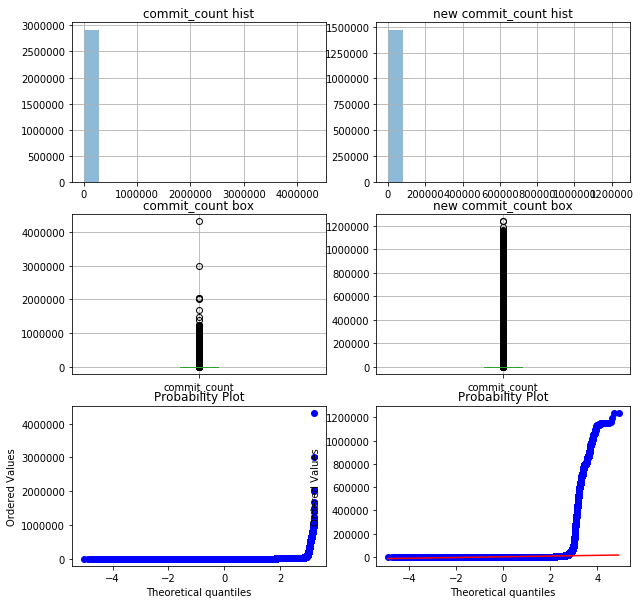

In [32]:
plt.figure(figsize = (10,10))

#直方图
plt.subplot(3,2,1)
plt.title("commit_count hist")
data['commit_count'].hist(alpha=0.5,bins=15)

plt.subplot(3,2,2)
plt.title("new commit_count hist")
del_null_data['commit_count'].hist(alpha=0.5,bins=15)


#盒图
plt.subplot(3,2,3)
plt.title("commit_count box")
data['commit_count'].plot(kind='box',grid=True)

plt.subplot(3,2,4)
plt.title("new commit_count box")
del_null_data['commit_count'].plot(kind='box',grid=True)

#q-q图
plt.subplot(3,2,5)
stats.probplot(data['commit_count'],dist="norm",plot=plt)

plt.subplot(3,2,6)
stats.probplot(del_null_data['commit_count'],dist="norm",plot=plt)

plt.show()

In [33]:
#对填充后的新数据进行描述
fill_data_with_most_frequency[['commit_count']].describe()

,commit_count
count,2917951.00
mean,613.97
std,16802.48
min,1.00
25%,9.00
50%,27.00
75%,89.00
max,4314502.00


### 方案三 通过属性的相关关系来填补缺失值

In [34]:
#查看相关的属性关系
data.corr()

,stars_count,forks_count,watchers,pull_requests,commit_count
stars_count,1.00,0.57,0.71,0.19,0.02
forks_count,0.57,1.00,0.49,0.21,0.02
watchers,0.71,0.49,1.00,0.16,0.02
pull_requests,0.19,0.21,0.16,1.00,0.05
commit_count,0.02,0.02,0.02,0.05,1.00


In [35]:
#通过属性的相关关系来填补缺失值
target_data = data['commit_count'].copy(deep=True)
source_data = data['pull_requests'].copy(deep=True)

flag1 = target_data.isnull().values
flag2 = source_data.isnull().values

i=0
for _,value in target_data.iteritems():
    if(flag1[i]==True) and (flag2[i]==False):
        target_data[i] = 500 + source_data[i]
    i=i+1

+ 新旧数据集对比

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


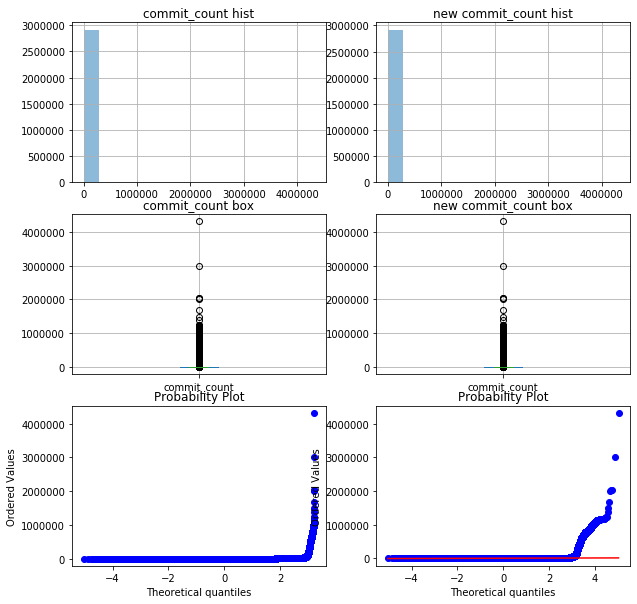

In [36]:
plt.figure(figsize = (10,10))

#直方图
plt.subplot(3,2,1)
plt.title("commit_count hist")
data['commit_count'].hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数

#直方图
plt.subplot(3,2,2)
plt.title("new commit_count hist")
target_data.hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数


#盒图
plt.subplot(3,2,3)
plt.title("commit_count box")
data['commit_count'].plot(kind='box',notch=True,grid=True)

#盒图
plt.subplot(3,2,4)
plt.title("new commit_count box")
target_data.plot(kind='box',notch=True,grid=True)

#q-q图
plt.subplot(3,2,5)
stats.probplot(data['commit_count'],dist="norm",plot=plt)

plt.subplot(3,2,6)
stats.probplot(target_data,dist="norm",plot=plt)

plt.show()

In [37]:
target_data.describe()

count   2917951.00
mean        614.30
std       16802.47
min           1.00
25%           9.00
50%          27.00
75%          89.00
max     4314502.00
Name: commit_count, dtype: float64

### 方案四 通过数据对象之间的相似性来填补缺失值

In [38]:
numeric_attr = ['commit_count','pull_requests']
#查找两个对象间的相似性
#如果通过暴力法求解耗时耗力
#所以选择通过二分法查找的方法进行相似性选择

def find_dis_value(dataset, pos, numeric_attr):
    def dis_objs(tar_obj_index, sou_obj_index):
        tar_obj = dataset.iloc[tar_obj_index]
        sou_obj = dataset.iloc[sou_obj_index]
        dis_value = 0
        for column in tar_obj.index:
            if column == 'pull_requests':
                if (not math.isnan(tar_obj[column])) and (not math.isnan(sou_obj[column])):                 
                    dis_value += sou_obj[column] - tar_obj[column]                
                else:
                    dis_value += 9998
        return dis_value

    
    mindis = 9999
    result_pos = -1
    leftindex = 0;
    rightindex = dataset.shape[0]-1
    #二分查找返回最近距离的一个result_pos
    while leftindex<=rightindex:
        midindex = int((leftindex+rightindex)/2)
        tmpdis = dis_objs(pos,midindex)        
        if(tmpdis>0):
            rightindex = midindex-1            
        elif(tmpdis == 0):
            result_pos = midindex
            break;
        else:
            leftindex = midindex+1        
        if(tmpdis<mindis):
            result_pos = midindex  
    return result_pos




# 通过数据对象之间的相似性来填补Data_Value缺失值
numical_datasets = pd.DataFrame(data[numeric_attr].copy(deep=True))

#对numical_datasets排序
numical_datasets.sort_values("pull_requests",inplace=True)
data_new = numical_datasets['commit_count'].copy(deep=True)

print('空数据数量为:',data_new.isnull().sum())
length = numical_datasets.shape[0]
count=1;
for i in range(length):
    if math.isnan(numical_datasets['commit_count'].iloc[i]):       
#         print('当前处理第'+str(count)+"个")
#         print(i,numical_datasets.iloc[i])  
         result_pos = find_dis_value(numical_datasets, i, numeric_attr)
#         print(result_pos,numical_datasets.iloc[result_pos])
         data_new.iloc[i] = data_new.iloc[result_pos]
#         print(i,data_area_id.iloc[i])
         count+=1
    
#填充后的空数据数量
print('填充后的空数据数量为:',data_new.isnull().sum())

空数据数量为: 1921
填充后的空数据数量为: 0


+ 新旧数据集对比

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


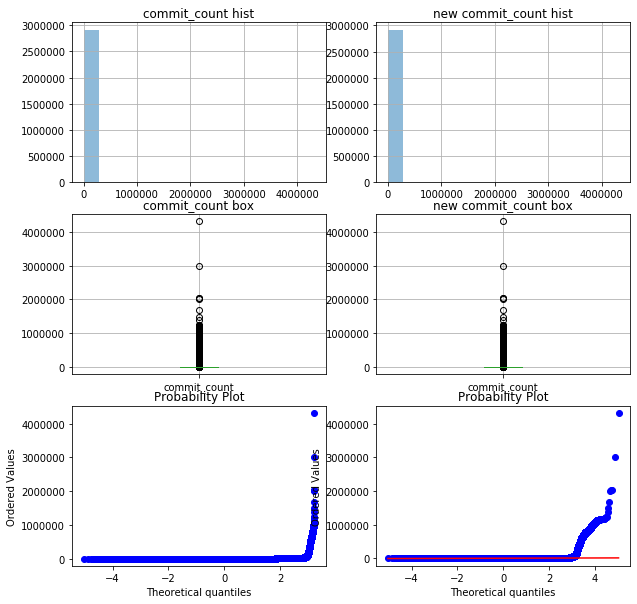

In [56]:
plt.figure(figsize = (10,10))

#直方图
plt.subplot(3,2,1)
plt.title("commit_count hist")
data['commit_count'].hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数

#直方图
plt.subplot(3,2,2)
plt.title("new commit_count hist")
data_new.hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数


#盒图
plt.subplot(3,2,3)
plt.title("commit_count box")
data['commit_count'].plot(kind='box',grid=True)

#盒图
plt.subplot(3,2,4)
plt.title("new commit_count box")
data_new.plot(kind='box',grid=True)

#q-q图
plt.subplot(3,2,5)
stats.probplot(data['commit_count'],dist="norm",plot=plt)

plt.subplot(3,2,6)
stats.probplot(data_new,dist="norm",plot=plt)

plt.show()